# Whelks and lobsters -- context operator

## The system

In [2]:
R.<x,y> = QQ[]

In [3]:
from lbuc import *

In [4]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v3 = v2 = [RIF(1,1.5), RIF(4,8)]

In [5]:
p = streamline_plot(tuple(vf),(x,0,1.8),(y,0,8), color='grey')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.6),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()
#    + point(v0, size=100, marker='X', color='red')\
#    + point(v1, size=100, marker='X', color='green')\


## Polynomial plot

In [8]:
reach = Reach(vf, v3, 10,
              order=5, step=(0.01, 0.5),
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7,
              symbolic_composition=True)

In [9]:
reach.wplot(u'x', u'y')

Exception: Not ran!

In [10]:
p1 = p + reach.sage_interval_plot(u'x', u'y',
                                  poly=(x - 1)^2 + y^2 - 0.2,
                                  aspect_ratio='automatic')
p1

Exception: Not ran!

## Simple signal

In [11]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

In [12]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True)
q = sig.plot(); q

FlowstarFailedException: Did not run successfully!
status = 4
num_flowpipes

(1.00000000000000, 1.50000000000000)
(4.00000000000000, 8.00000000000000)


/usr/lib64/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


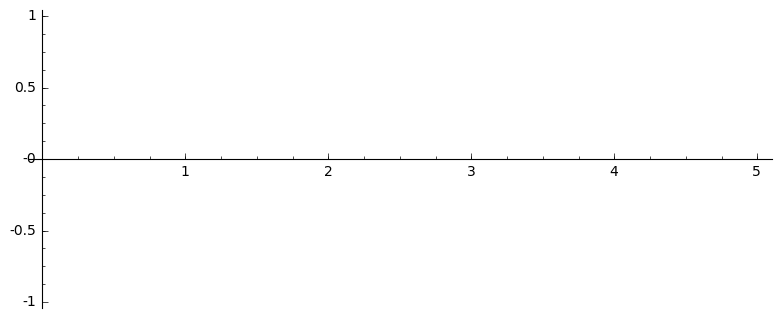

In [13]:
csig = P.context_signal_for_system(vf, v3, 5, order=5, step=0.01,
                           precondition=1,
                           estimation=1e-3,
                           integrationScheme=2,
                           cutoff_threshold=1e-5,
                           symbolic_composition=True)
csig.signal.plot()

In [14]:
ps = graphics_array(
    [c.signal.plot() for c in csig.children],
    4,
    1
)

(1.00000000000000, 1.25000000000000)
(4.00000000000000, 6.00000000000000)
(1.00000000000000, 1.25000000000000)
(4.00000000000000, 6.00000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[0.61999999999999422 .. 2.3400000000000097]]
(1.00000000000000, 1.25000000000000)
(6.00000000000000, 8.00000000000000)
(1.00000000000000, 1.25000000000000)
(6.00000000000000, 8.00000000000000)
(1.25000000000000, 1.50000000000000)
(4.00000000000000, 6.00000000000000)
(1.25000000000000, 1.50000000000000)
(4.00000000000000, 6.00000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[0.51999999999999635 .. 0.63000000000000056], 
 [0.63500948044801752 .. 0.64000000000000057], 
 [0.64538948810885710 .. 0.65000000000000058], 
 [0.65577003183679261 .. 0.66000000000000059], 
 [0.66618137767101559 .. 0.67000000000000060], 
 [0.67656362746553277 .. 0.68000000000000061], 
 [0.68698010320394986 .. 0.69000000000000062], 
 [0.69742874239998142 .. 0.70000000000000063], 
 [0.

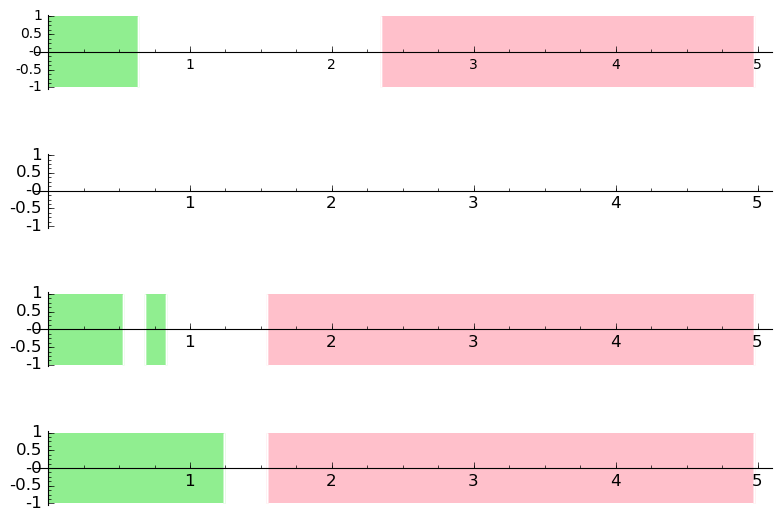

In [15]:
ps.show(aspect_ratio=1/4)

In [16]:
q = csig.plot_histogram2d(1)

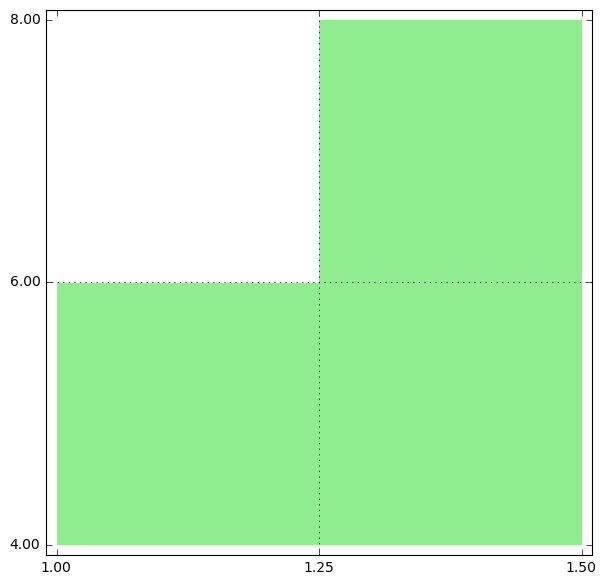

In [17]:
q.show()

In [18]:
pps = graphics_array(
    [c.signal.plot() for c in csig.children[1].children],
    4,
    1
)

(1.00000000000000, 1.12500000000000)
(6.00000000000000, 7.00000000000000)
(1.00000000000000, 1.12500000000000)
(6.00000000000000, 7.00000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[1.2492250678510781 .. 1.2500000000000012], 
 [1.2578875074948581 .. 1.2600000000000012], 
 [1.2665561557797917 .. 1.2700000000000012], 
 [1.2752320782050037 .. 2.1024408306396221]]
(1.00000000000000, 1.12500000000000)
(7.00000000000000, 8.00000000000000)
(1.00000000000000, 1.12500000000000)
(7.00000000000000, 8.00000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[1.1093699904293548 .. 1.1100000000000010], 
 [1.1184376243136500 .. 1.1200000000000010], 
 [1.1275338807572996 .. 1.1300000000000011], 
 [1.1366568254229834 .. 1.1400000000000011], 
 [1.1458071063957884 .. 1.1500000000000011], 
 [1.1546085143528113 .. 2.0000000000000018]]
(1.12500000000000, 1.25000000000000)
(6.00000000000000, 7.00000000000000)
(1.12500000000000, 1.25000000000000)
(6.0000000000

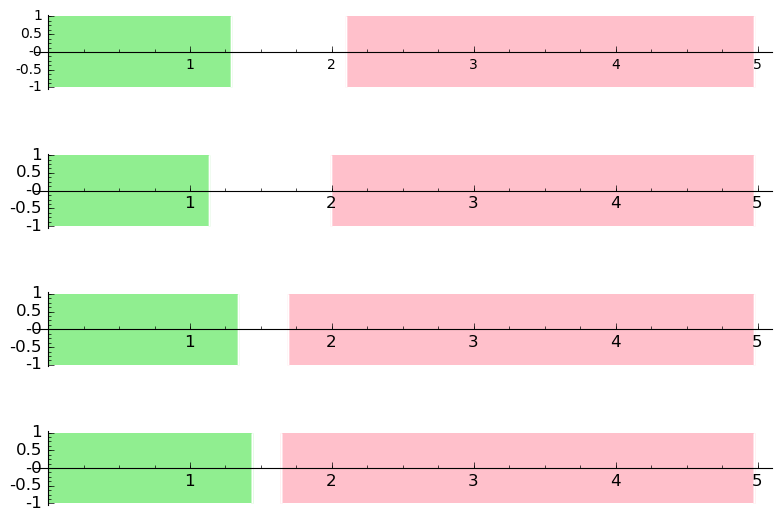

In [19]:
pps.show(aspect_ratio=1/4)

In [20]:
sig = csig.children[1].refined_signal(1)

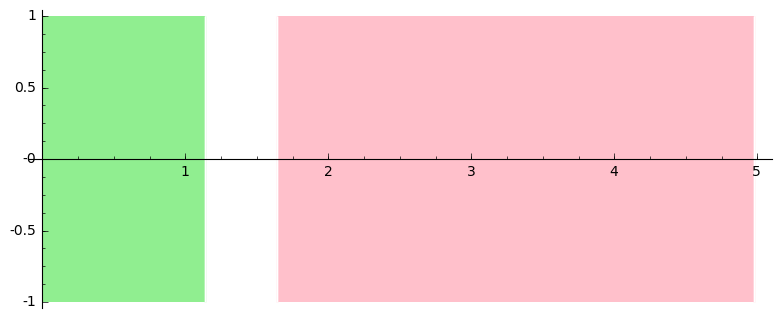

In [21]:
sig.plot()

In [22]:
sig = csig.refined_signal(1)

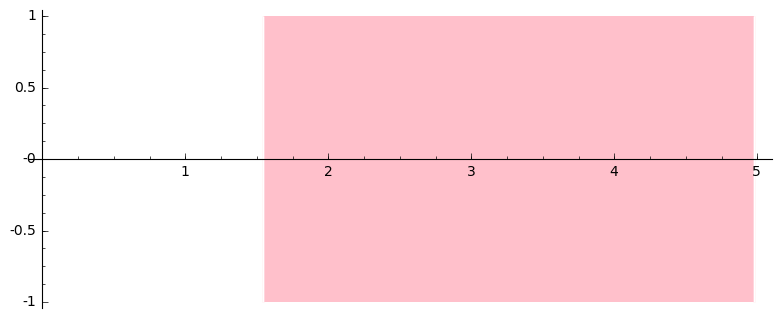

In [23]:
sig.plot()

In [24]:
sig = csig.refined_signal(2)

(1.00000000000000, 1.12500000000000)
(4.00000000000000, 5.00000000000000)
(1.00000000000000, 1.12500000000000)
(4.00000000000000, 5.00000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[1.6380007395570121 .. 1.6400000000000015], 
 [1.6459380072089009 .. 2.3289906655648705]]
(1.00000000000000, 1.12500000000000)
(5.00000000000000, 6.00000000000000)
(1.00000000000000, 1.12500000000000)
(5.00000000000000, 6.00000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[1.4680397010143835 .. 1.4700000000000014], 
 [1.4756624388170567 .. 2.2300000000000071]]
(1.12500000000000, 1.25000000000000)
(4.00000000000000, 5.00000000000000)
(1.12500000000000, 1.25000000000000)
(4.00000000000000, 5.00000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[0.89999999999998825 .. 2.0700000000000034]]
(1.12500000000000, 1.25000000000000)
(5.00000000000000, 6.00000000000000)
(1.12500000000000, 1.25000000000000)
(5.00000000000000, 6.0000000000000

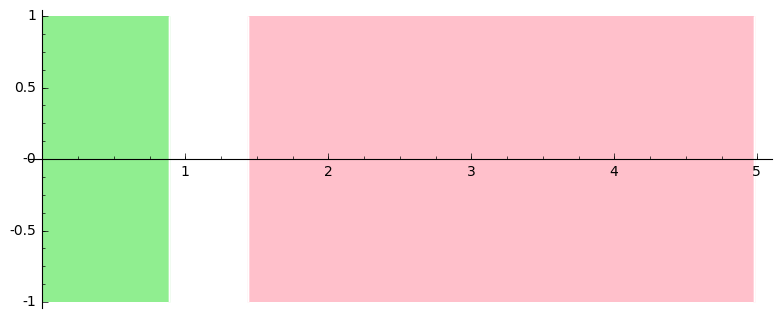

In [25]:
sig.plot()

In [37]:
q = csig.plot_histogram2d(2)

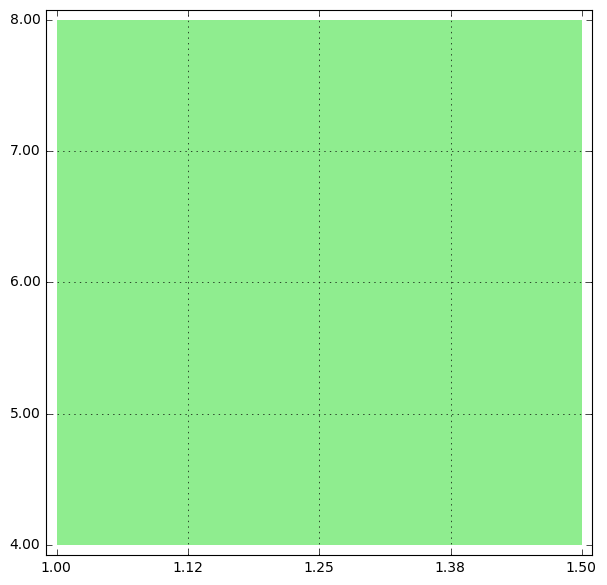

In [38]:
q.show()

In [ ]:
m.transpose()

In [26]:
csig.F(RIF(2)).histogram2d(2)

[ 0  0|-1 -1]
[ 0  0|-1 -1]
[-----+-----]
[ 0  0|-1 -1]
[-1 -1|-1 -1]

In [27]:
q = csig.F(RIF(2)).plot_histogram2d(2)

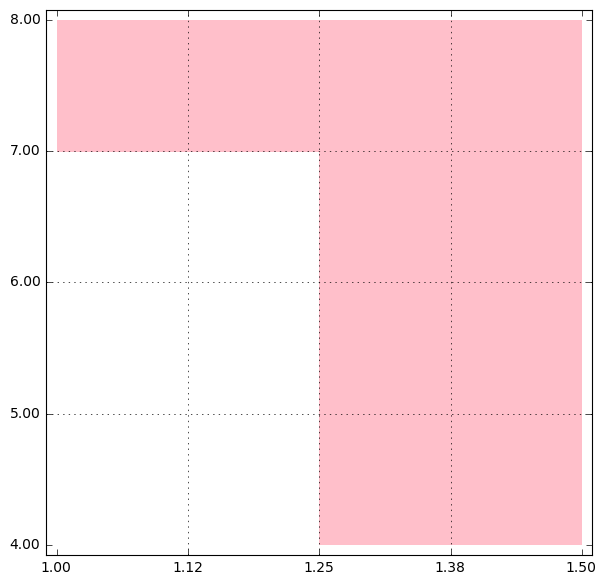

In [28]:
q.show()

In [39]:
q = csig.F(RIF(2)).plot_histogram2d(3)

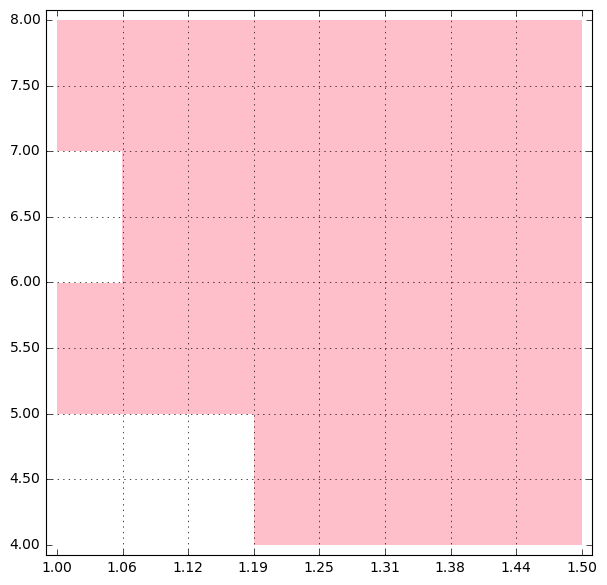

In [40]:
q

In [30]:
q = csig.F(RIF(2)).plot_histogram2d(4)

(1.00000000000000, 1.03125000000000)
(4.00000000000000, 4.25000000000000)
(1.00000000000000, 1.03125000000000)
(4.00000000000000, 4.25000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[2.1269044690819098 .. 2.3200000000000092], 
 [2.4399999999999137 .. 2.4500000000000122], 
 [3.5699999999998395 .. 3.5800000000000383]]
(1.00000000000000, 1.03125000000000)
(4.25000000000000, 4.50000000000000)
(1.00000000000000, 1.03125000000000)
(4.25000000000000, 4.50000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[2.1133225530300374 .. 2.2948959232657070], 
 [3.9799999999998125 .. 3.9900000000000478]]
(1.03125000000000, 1.06250000000000)
(4.00000000000000, 4.25000000000000)
(1.03125000000000, 1.06250000000000)
(4.00000000000000, 4.25000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[1.9978167651035609 .. 2.1708469064826562]]
(1.03125000000000, 1.06250000000000)
(4.25000000000000, 4.50000000000000)
(1.03125000000000, 1.06250

(1.06250000000000, 1.09375000000000)
(5.50000000000000, 5.75000000000000)
(1.06250000000000, 1.09375000000000)
(5.50000000000000, 5.75000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[1.7674821029282257 .. 1.9336643396679290], 
 [3.8399999999998217 .. 3.8500000000000445]]
(1.06250000000000, 1.09375000000000)
(5.75000000000000, 6.00000000000000)
(1.06250000000000, 1.09375000000000)
(5.75000000000000, 6.00000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[1.7363401167386069 .. 1.9241473893695187], 
 [2.4199999999999151 .. 2.4300000000000118], 
 [3.4099999999998500 .. 3.4200000000000346], 
 [3.8999999999998178 .. 3.9100000000000459]]
(1.09375000000000, 1.12500000000000)
(5.50000000000000, 5.75000000000000)
(1.09375000000000, 1.12500000000000)
(5.50000000000000, 5.75000000000000)
domain = [0.00000000000000000 .. 4.9999999999999992]
roots = [[1.6889893718045398 .. 1.6900000000000016], 
 [1.6906028458128734 .. 1.8331408739911373], 
 [2.629

limit_output extension: Maximum message size of 10000 exceeded with 11146 characters

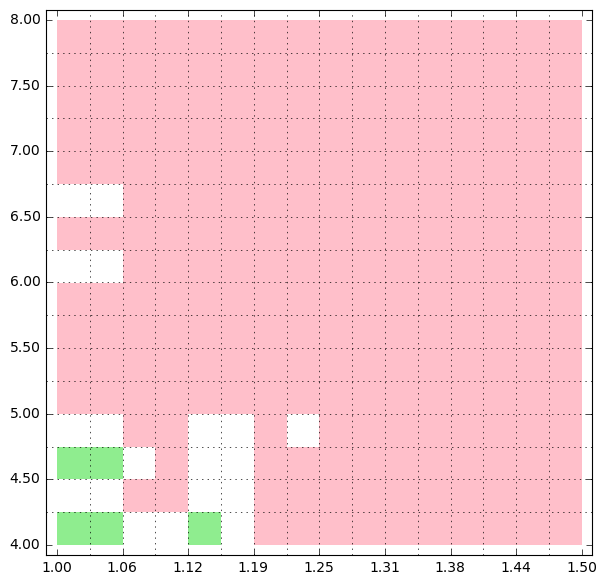

In [31]:
q.show()

In [32]:
sig = csig.refined_signal(2)

In [ ]:
sig.plot()

In [ ]:
sig = csig.refined_signal(3)

In [ ]:
sig.plot()

In [ ]:
sig2 = Atomic(x - 1.19).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
sig2.plot()

In [ ]:
csig2 = Atomic(x - 1.2).context_signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
csig2.signal.plot()

In [ ]:
csig2.refined_signal(1).plot()

In [ ]:
(csig.refined_signal(1) | csig2.refined_signal(1)).plot()

In [ ]:
(csig | csig2).refined_signal(1).plot()

In [ ]:
sig = (csig.refined_signal(2) | csig2.refined_signal(2))

In [ ]:
sig.plot()

In [ ]:
(csig | csig2).refined_signal(2).plot()

In [ ]:
sig = (csig | csig2).refined_signal(3)

In [ ]:
sig.plot()

## Polynomial plot

In [ ]:
reach = Reach(vf, v3, 10,
              order=5, step=(0.01, 0.5),
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7,
              symbolic_composition=True)

In [ ]:
reach.wplot('x', 'y')

In [ ]:
p1 = p + reach.sage_interval_plot('x', 'y',
                                  poly=(x - 1)^2 + y^2 - 0.2,
                                  aspect_ratio='automatic')
p1

In [ ]:
p1.save("/home/twright/Documents/PhD/Posters/PPAR Poster 4/images/phase_portrait.svg")

## Context

In [43]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
    symbolic_composition=True,
)
args = (vf, v3, 7)

In [44]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

C({x: [0.050000000000000002 .. 0.10000000000000001]}, G([0.00000000000000000 .. 0.20000000000000002], Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)))

In [45]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

FlowstarFailedException: Did not run successfully!
status = 4
num_flowpipes

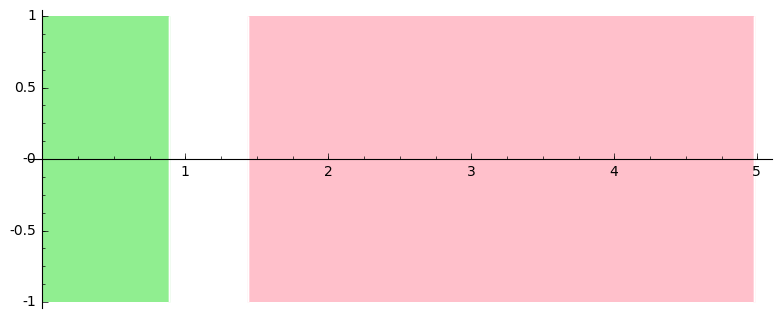

In [46]:
sig.plot()

### Context $\rightarrow$ Context Signal

In [47]:
ctx_sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
           ).context_signal_for_system(vf, v3, 10, **kwargs)
ctx_sig

Exception: Not ran!

In [48]:
sig = ctx_sig.signal

NameError: name 'ctx_sig' is not defined

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()

In [ ]:
ctx_sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
           ).context_signal_for_system(vf, v3, 10, refine=1, **kwargs)
ctx_sig

In [ ]:
sig = ctx_sig.signal

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(2)

In [ ]:
sig.plot()

## Differential Context

In [ ]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

In [ ]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [ ]:
kwargs['verbosity'] = 10

In [ ]:
kwargs['symbolic_composition'] = True

In [ ]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

In [ ]:
ctx_sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
          ).context_signal_for_system(vf, v3, 10, **kwargs)
ctx_sig

In [ ]:
sig = ctx_sig.signal
sig

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()

In [ ]:
ctx_sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
          ).context_signal_for_system(vf, v3, 10, refine=1, **kwargs)
ctx_sig

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()

## More complex property (implication)

In [ ]:
phi = G(RIF(0, 1),
  ~(Atomic(y - RIF(5.5)) | (
      {'x': RIF(0.3, 0.35)} >> G(RIF(0, 4), Atomic(y - 3)))))
phi

In [ ]:
v3

In [ ]:
v4 = [RIF(0.25, 0.3), RIF(6, 6.5)]

In [ ]:
csig = phi.context_signal_for_system(vf, v4, 5, order=5, step=0.01,
                                     precondition=1,
                                     estimation=1e-3,
                                     integrationScheme=2,
                                     cutoff_threshold=1e-5,
                                     symbolic_composition=True)

In [ ]:
sig = csig.signal
sig

In [ ]:
sig.plot()

In [ ]:
sig1 = csig.refined_signal(1)

In [ ]:
sig1.plot()

In [ ]:
p = csig.F(RIF(2)).plot_histogram2d(3)

In [ ]:
p.show()

In [ ]:
block_matrix(2, 2, [matrix([[1]]), matrix([[2]]), matrix([[3]]), matrix([[4]])])

In [ ]:
m = block_matrix(2, 2, [matrix([[1]]), matrix([[3]]), matrix([[2]]), matrix([[4]])])
m

In [ ]:
m.transpose()

In [ ]:
matrix_plot(m.transpose()[::-1, :], colorbar=True)